EDA - 1 || Title: Bike Details Dataset

Saving BIKE DETAILS.csv to BIKE DETAILS (3).csv
Data Loaded Successfully!

1. Range of Selling Prices: 755000

2. Median Selling Price: 45000.0

3. Most Common Seller Type: Individual

4. Number of Bikes Driven More Than 50,000 km: 170

5. Average km_driven for each Ownership Type:
owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64

6. Proportion of Bikes from 2015 or Older: 56.64%

7. Missing Values Trend:
name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

8. Highest Ex-Showroom Price: 1278000.0 for Harley-Davidson Street Bob

9. Number of Bikes Listed by Each Seller Type:
seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64


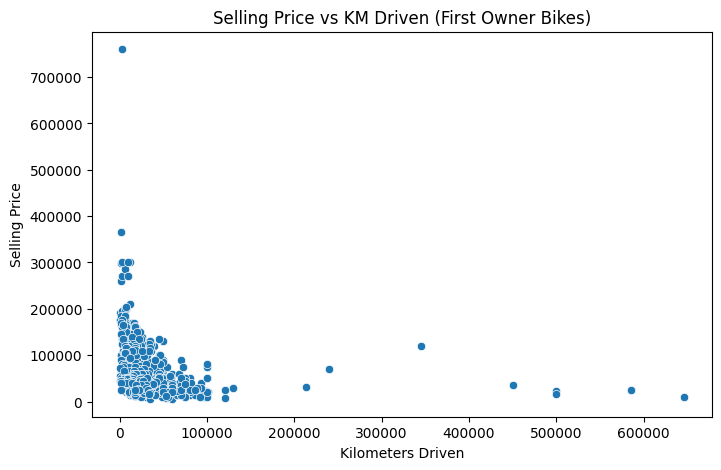


11. Outliers Removed in km_driven Column


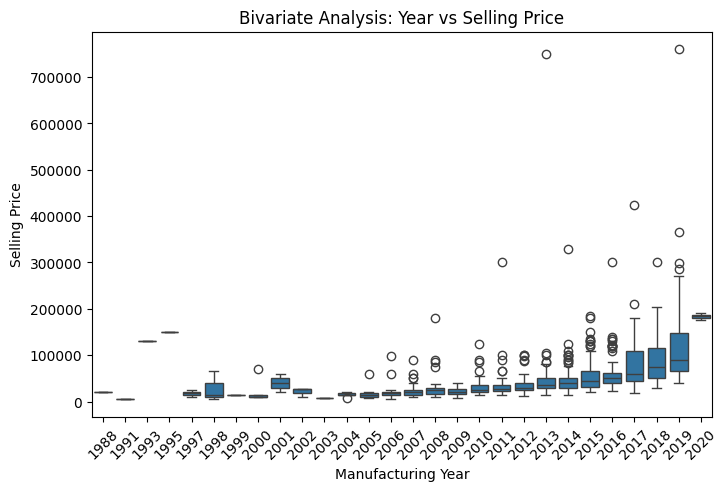


13. Average Depreciation in Selling Price Based on Bike Age:
age
4     183333.333333
5     119689.511628
6      87660.374046
7      78894.736842
8      58469.018692
9      56500.000000
10     48668.131868
11     51136.986301
12     35748.400000
13     35655.721311
14     31793.333333
15     22267.857143
16     34289.285714
17     24927.586207
18     23380.000000
19     16978.571429
20     15100.000000
21      8000.000000
22     20666.666667
23     40000.000000
24     20833.333333
25     15000.000000
26     28333.333333
27     17500.000000
29    150000.000000
31    130000.000000
33      6000.000000
36     20000.000000
Name: selling_price, dtype: float64

14. Bikes Priced Above Average for Their Year:
                                      name  year  selling_price
0                Royal Enfield Classic 350  2019         175000
2      Royal Enfield Classic Gunmetal Grey  2018         150000
3        Yamaha Fazer FI V 2.0 [2016-2018]  2015          65000
7     Royal Enfield Bullet 350 [20

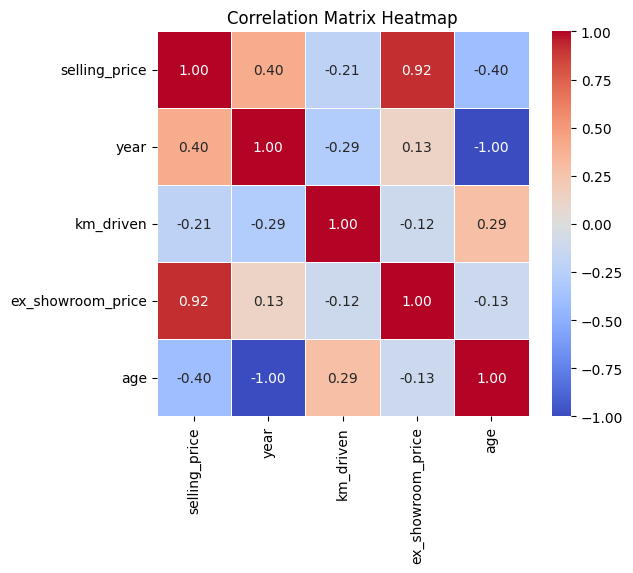

In [7]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import files

uploaded = files.upload()
# Load the dataset
df = pd.read_csv("BIKE DETAILS.csv")
print("Data Loaded Successfully!")



# 1. RANGE OF SELLING PRICES

selling_price_range = df['selling_price'].max() - df['selling_price'].min()
print(f"\n1. Range of Selling Prices: {selling_price_range}")


# 2. MEDIAN SELLING PRICE

median_selling_price = df['selling_price'].median()
print(f"\n2. Median Selling Price: {median_selling_price}")


# 3. MOST COMMON SELLER TYPE

most_common_seller_type = df['seller_type'].mode()[0]
print(f"\n3. Most Common Seller Type: {most_common_seller_type}")


# 4. NUMBER OF BIKES WITH >50,000 KM DRIVEN

high_km_bikes = df[df['km_driven'] > 50000].shape[0]
print(f"\n4. Number of Bikes Driven More Than 50,000 km: {high_km_bikes}")


# 5. AVERAGE km_driven FOR EACH OWNERSHIP TYPE

avg_km_per_owner = df.groupby('owner')['km_driven'].mean()
print(f"\n5. Average km_driven for each Ownership Type:\n{avg_km_per_owner}")


# 6. PROPORTION OF BIKES FROM 2015 OR OLDER

current_year = 2024  # Change this if needed
older_bikes_count = df[df['year'] <= 2015].shape[0]
total_bikes_count = df.shape[0]
older_bikes_proportion = (older_bikes_count / total_bikes_count) * 100
print(f"\n6. Proportion of Bikes from 2015 or Older: {older_bikes_proportion:.2f}%")


# 7. TREND OF MISSING VALUES

missing_values = df.isnull().sum()
print(f"\n7. Missing Values Trend:\n{missing_values}")


# 8. HIGHEST EX-SHOWROOM PRICE AND BIKE NAME

highest_ex_showroom_price = df['ex_showroom_price'].max()
bike_with_highest_price = df[df['ex_showroom_price'] == highest_ex_showroom_price]['name'].values[0]
print(f"\n8. Highest Ex-Showroom Price: {highest_ex_showroom_price} for {bike_with_highest_price}")


# 9. TOTAL NUMBER OF BIKES LISTED BY EACH SELLER TYPE

bikes_per_seller = df['seller_type'].value_counts()
print(f"\n9. Number of Bikes Listed by Each Seller Type:\n{bikes_per_seller}")


# 10. RELATIONSHIP BETWEEN SELLING PRICE & KM_DRIVEN FOR FIRST-OWNER BIKES

first_owner_bikes = df[df['owner'] == '1st owner']
plt.figure(figsize=(8,5))
sns.scatterplot(x=first_owner_bikes['km_driven'], y=first_owner_bikes['selling_price'])
plt.title("Selling Price vs KM Driven (First Owner Bikes)")
plt.xlabel("Kilometers Driven")
plt.ylabel("Selling Price")
plt.show()


# 11. REMOVE OUTLIERS IN km_driven USING IQR

Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_filtered = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]
print("\n11. Outliers Removed in km_driven Column")


# 12. BIVARIATE ANALYSIS: YEAR VS SELLING PRICE

plt.figure(figsize=(8,5))
sns.boxplot(x=df['year'], y=df['selling_price'])
plt.xticks(rotation=45)
plt.title("Bivariate Analysis: Year vs Selling Price")
plt.xlabel("Manufacturing Year")
plt.ylabel("Selling Price")
plt.show()


# 13. AVERAGE DEPRECIATION BASED ON AGE

df['age'] = current_year - df['year']
avg_depreciation = df.groupby('age')['selling_price'].mean()
print(f"\n13. Average Depreciation in Selling Price Based on Bike Age:\n{avg_depreciation}")


# 14. BIKES PRICED SIGNIFICANTLY ABOVE AVERAGE FOR THEIR MANUFACTURING YEAR

yearly_avg_price = df.groupby('year')['selling_price'].mean()
df['above_avg'] = df.apply(lambda row: row['selling_price'] > yearly_avg_price[row['year']], axis=1)
above_avg_bikes = df[df['above_avg']][['name', 'year', 'selling_price']]
print(f"\n14. Bikes Priced Above Average for Their Year:\n{above_avg_bikes}")


# 15. CORRELATION MATRIX WITH HEATMAP

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

# Plot correlation heatmap
plt.figure(figsize=(6,5))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

EDA-2 || Title: Car Sale Dataset

Saving Car Sale.csv to Car Sale (1).csv
Data Loaded Successfully!

Average selling price per dealer:
Dealer_Name
U-Haul CO                                          28769.919006
Classic Chevy                                      28602.014446
Rabun Used Car Sales                               28527.536177
Iceberg Rentals                                    28522.958533
Enterprise Rent A Car                              28312.580800
Scrivener Performance Engineering                  28297.371589
Gartner Buick Hyundai Saab                         28247.621019
Saab-Belle Dodge                                   28190.139888
Capitol KIA                                        28189.703822
Race Car Help                                      28163.372706
Chrysler of Tri-Cities                             28123.091054
Star Enterprises Inc                               28113.055244
Suburban Ford                                      28112.206758
C & M Motors Inc                                   2811

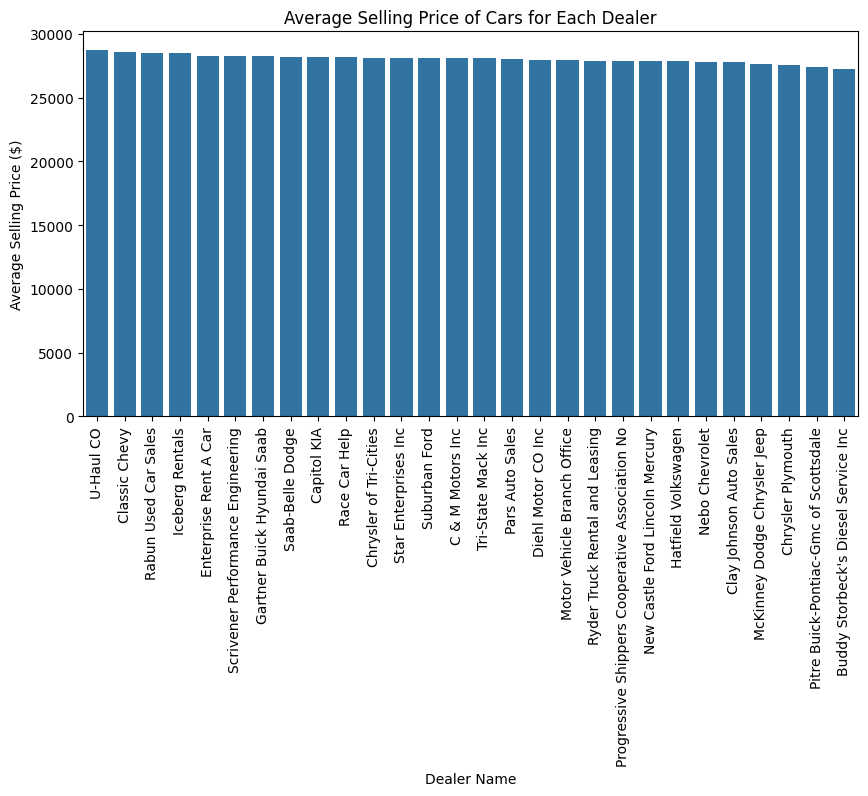


Car brand with highest price variation:
Company
Lincoln       19658.050211
Saab          19653.740089
Cadillac      19517.120220
Plymouth      19065.997338
Lexus         17852.923492
Buick         17142.232626
Mercury       16445.172195
Nissan        16214.264017
Saturn        15990.223671
Ford          15849.090227
Mercedes-B    15722.807459
Oldsmobile    15711.345857
Toyota        15367.131714
BMW           15065.578723
Pontiac       14348.963592
Infiniti      13696.332844
Chevrolet     13311.063223
Volvo         12933.790185
Subaru        12920.771620
Audi          12904.243867
Volkswagen    12527.124011
Mitsubishi    11671.343035
Chrysler      11583.286811
Dodge         11187.592085
Honda         11148.629062
Jaguar        10222.531533
Jeep           9459.834418
Acura          8183.046414
Porsche        5261.839206
Hyundai        3485.982649
Name: Price ($), dtype: float64


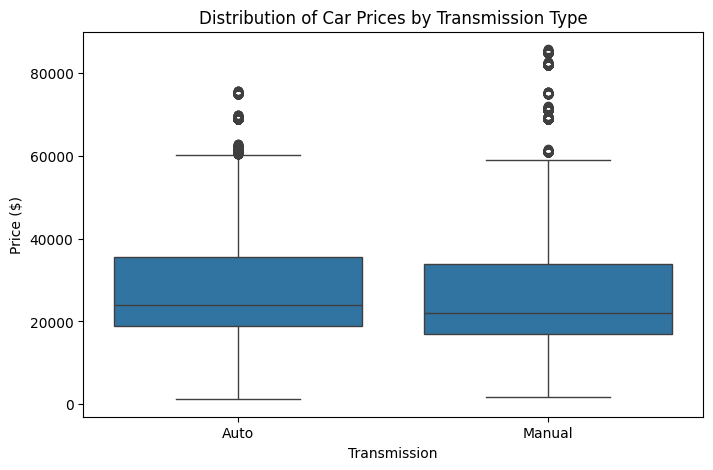

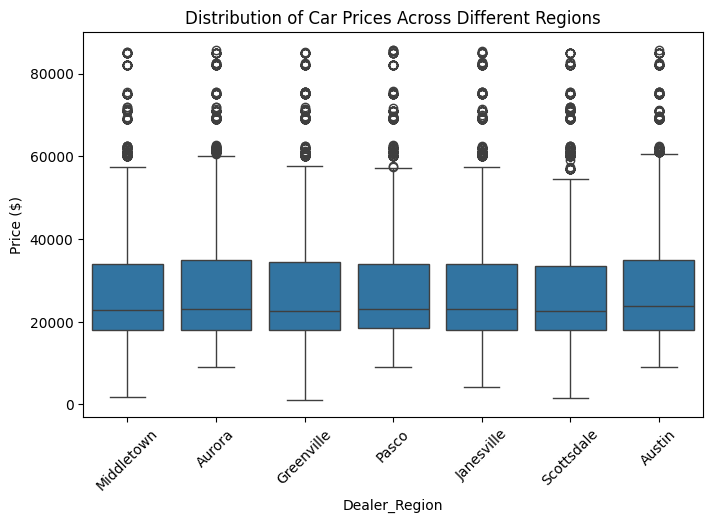

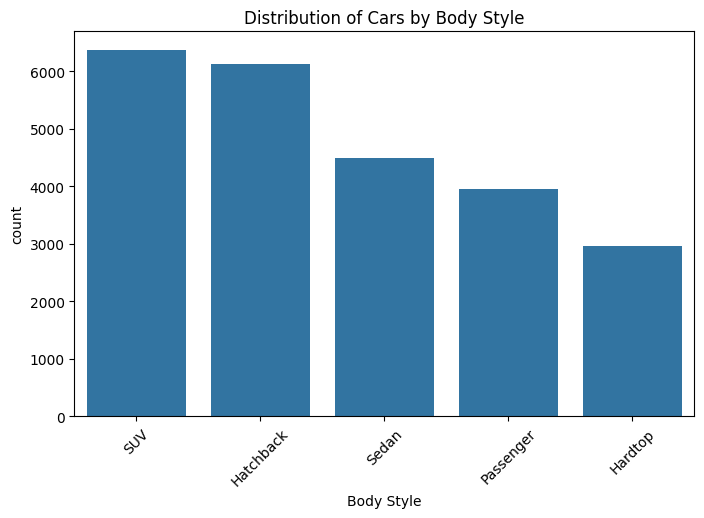

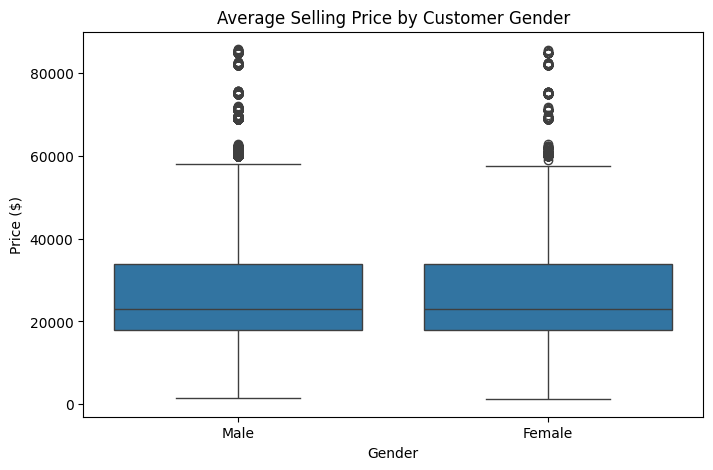

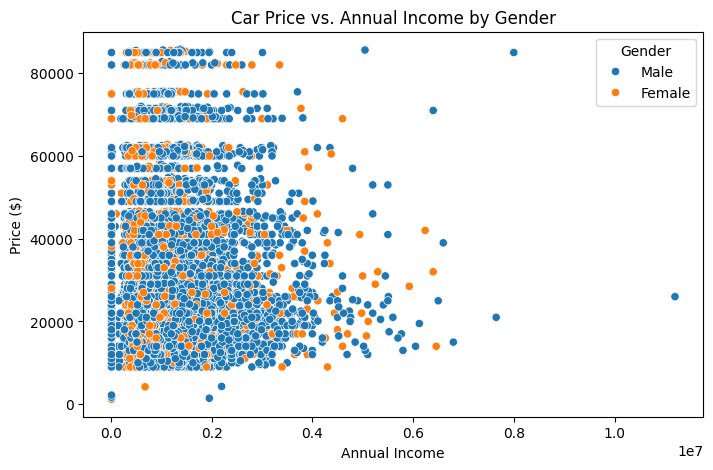


Number of Cars Sold by Region:
Dealer_Region
Austin        4135
Janesville    3821
Scottsdale    3433
Pasco         3131
Aurora        3130
Greenville    3128
Middletown    3128
Name: count, dtype: int64


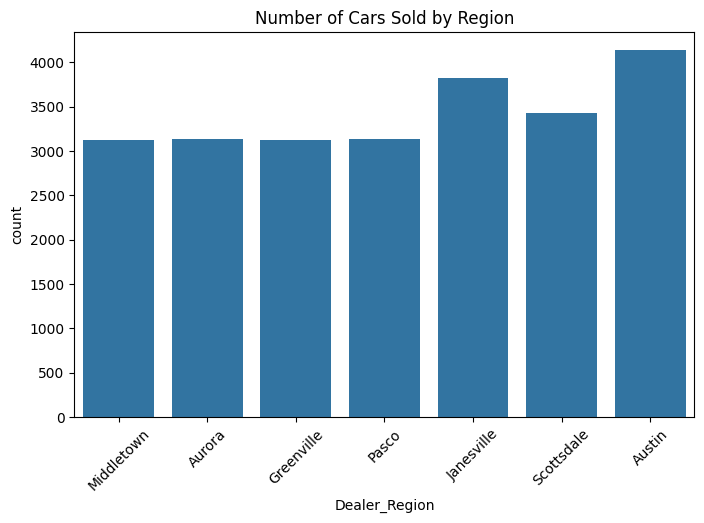

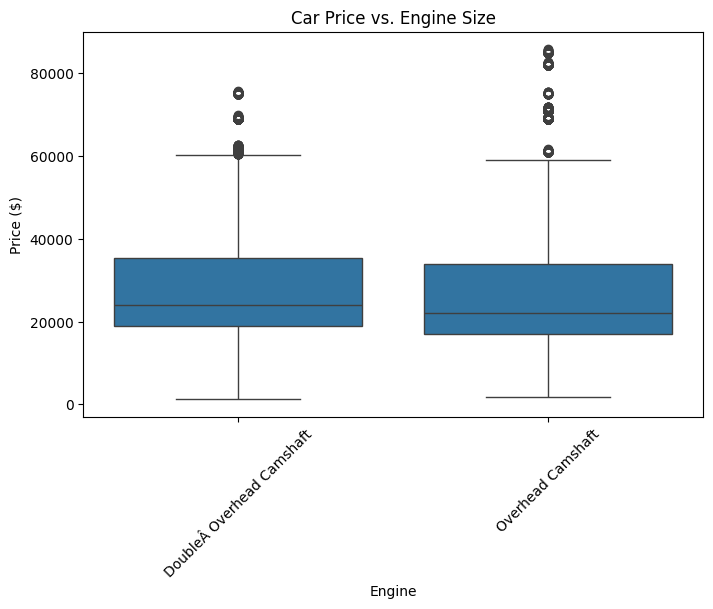

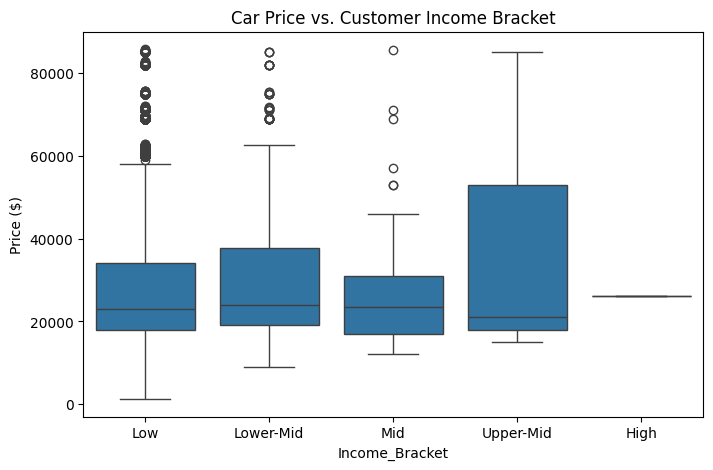


Top 5 Car Models with Highest Sales:
Model
Diamante      418
Prizm         411
Silhouette    411
Passat        391
Ram Pickup    383
Name: count, dtype: int64


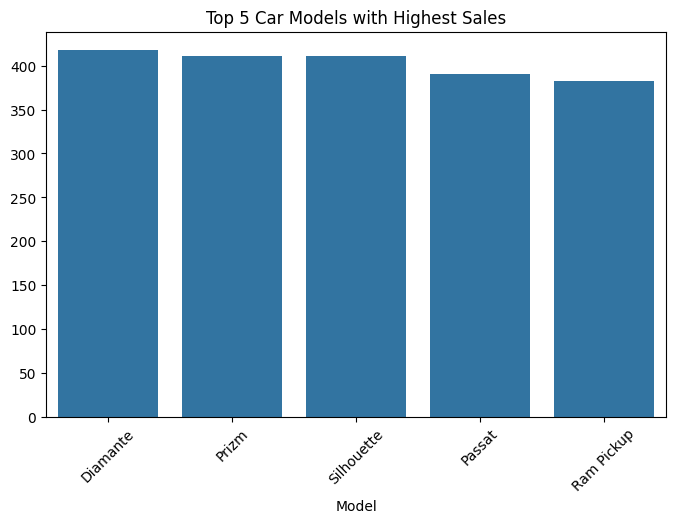

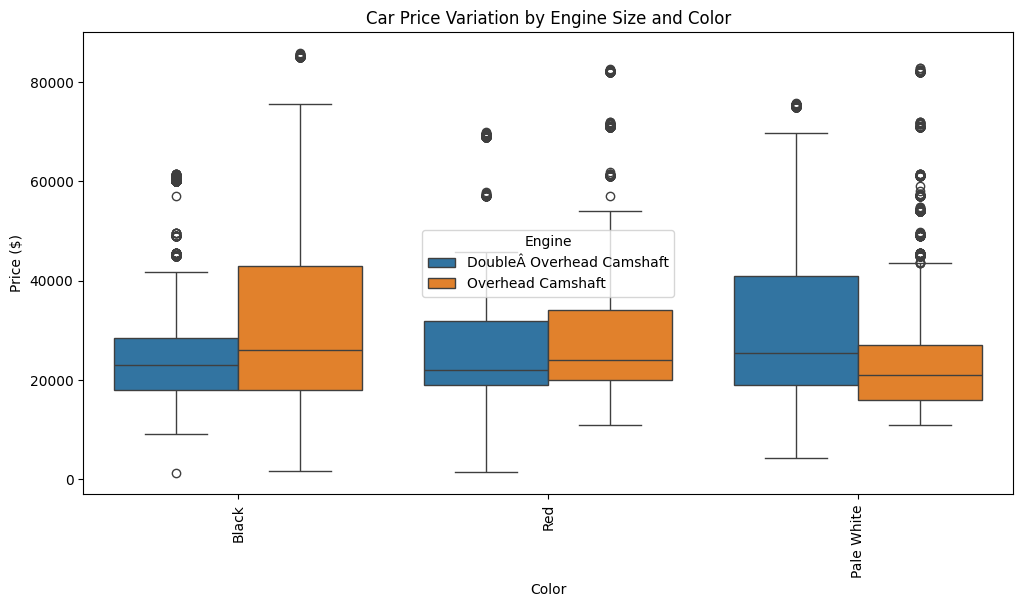

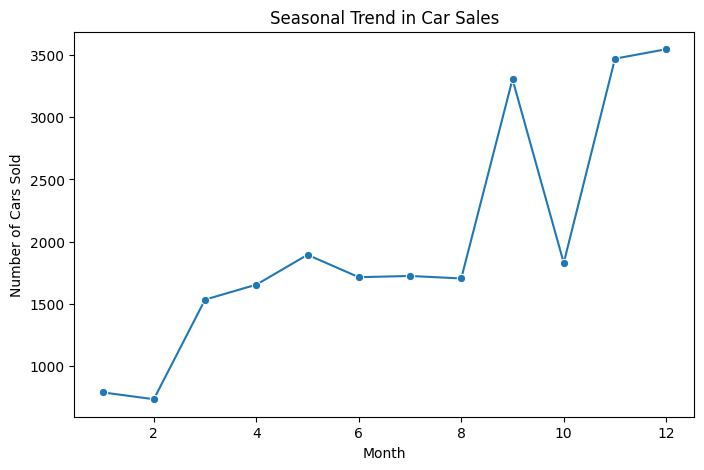

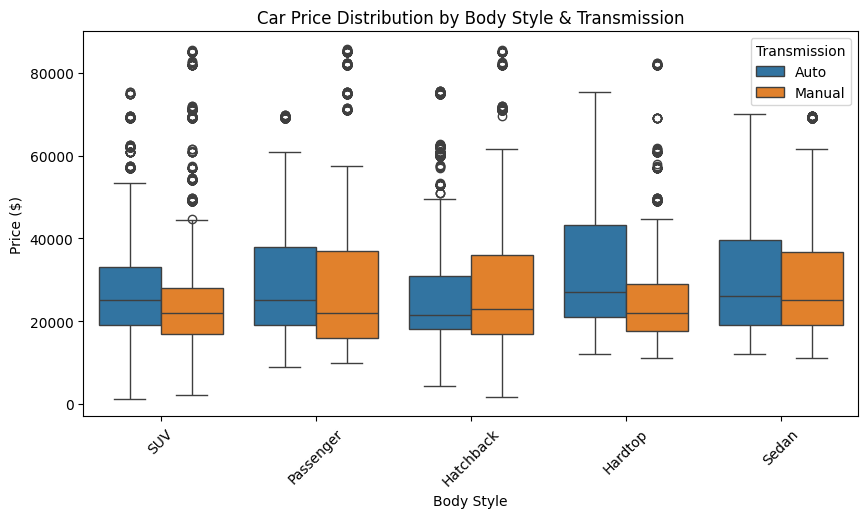

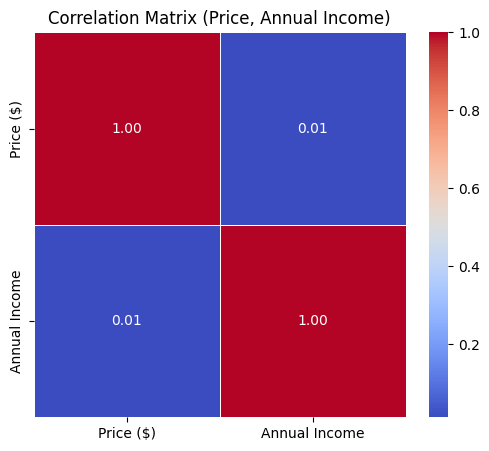

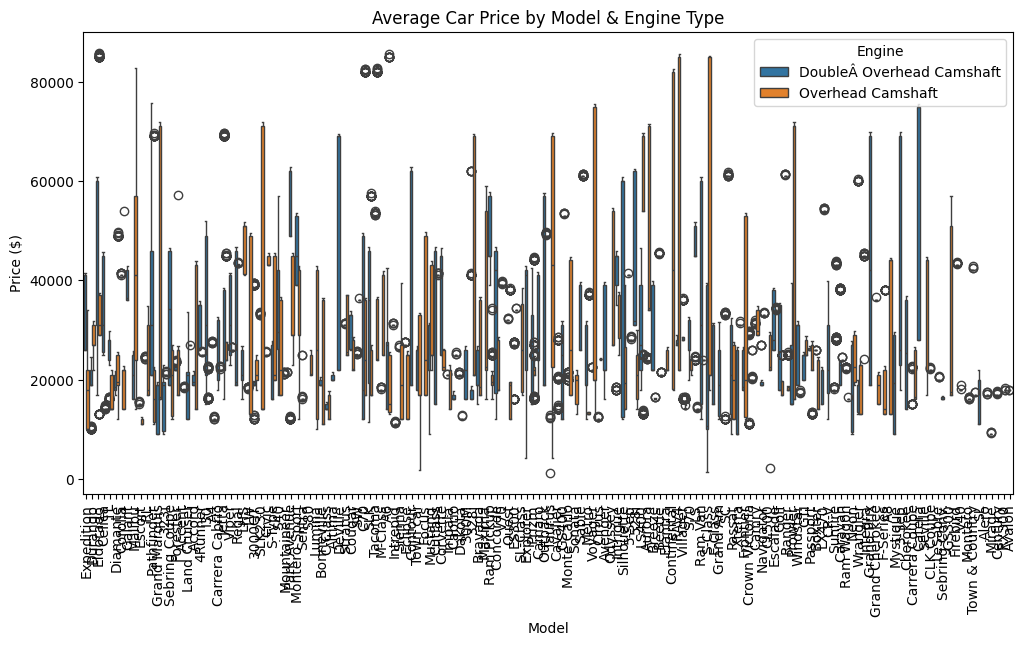

In [10]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files

uploaded = files.upload()
# Load the dataset
df = pd.read_csv("Car Sale.csv")
print("Data Loaded Successfully!")



# 1. Average Selling Price of Cars for Each Dealer

avg_price_per_dealer = df.groupby("Dealer_Name")["Price ($)"].mean().sort_values(ascending=False)
print("\nAverage selling price per dealer:")
print(avg_price_per_dealer)

plt.figure(figsize=(10,5))
sns.barplot(x=avg_price_per_dealer.index, y=avg_price_per_dealer.values)
plt.xticks(rotation=90)
plt.xlabel("Dealer Name")
plt.ylabel("Average Selling Price ($)")
plt.title("Average Selling Price of Cars for Each Dealer")
plt.show()


# 2. Car Brand with Highest Variation in Prices

price_variation = df.groupby("Company")["Price ($)"].std().sort_values(ascending=False)
print("\nCar brand with highest price variation:")
print(price_variation)


# 3. Distribution of Car Prices by Transmission Type

plt.figure(figsize=(8,5))
sns.boxplot(x="Transmission", y="Price ($)", data=df)
plt.title("Distribution of Car Prices by Transmission Type")
plt.show()


# 4. Distribution of Car Prices by Region

plt.figure(figsize=(8,5))
sns.boxplot(x="Dealer_Region", y="Price ($)", data=df)
plt.title("Distribution of Car Prices Across Different Regions")
plt.xticks(rotation=45)
plt.show()


# 5. Distribution of Cars Based on Body Style

plt.figure(figsize=(8,5))
sns.countplot(x="Body Style", data=df, order=df["Body Style"].value_counts().index)
plt.title("Distribution of Cars by Body Style")
plt.xticks(rotation=45)
plt.show()


# 6. Average Selling Price by Gender & Annual Income

plt.figure(figsize=(8,5))
sns.boxplot(x="Gender", y="Price ($)", data=df)
plt.title("Average Selling Price by Customer Gender")
plt.show()

plt.figure(figsize=(8,5))
sns.scatterplot(x="Annual Income", y="Price ($)", hue="Gender", data=df)
plt.title("Car Price vs. Annual Income by Gender")
plt.show()


# 7. Distribution of Car Prices by Region & Number of Cars Sold

region_sales = df["Dealer_Region"].value_counts()
print("\nNumber of Cars Sold by Region:")
print(region_sales)

plt.figure(figsize=(8,5))
sns.countplot(x="Dealer_Region", data=df)
plt.title("Number of Cars Sold by Region")
plt.xticks(rotation=45)
plt.show()


# 8. Average Car Price by Engine Size

plt.figure(figsize=(8,5))
sns.boxplot(x="Engine", y="Price ($)", data=df)
plt.title("Car Price vs. Engine Size")
plt.xticks(rotation=45)
plt.show()


# 9. Car Prices Based on Customer Annual Income Bracket

df["Income_Bracket"] = pd.cut(df["Annual Income"], bins=5, labels=["Low", "Lower-Mid", "Mid", "Upper-Mid", "High"])
plt.figure(figsize=(8,5))
sns.boxplot(x="Income_Bracket", y="Price ($)", data=df)
plt.title("Car Price vs. Customer Income Bracket")
plt.show()


# 10. Top 5 Car Models with Highest Sales

top_models = df["Model"].value_counts().nlargest(5)
print("\nTop 5 Car Models with Highest Sales:")
print(top_models)

plt.figure(figsize=(8,5))
sns.barplot(x=top_models.index, y=top_models.values)
plt.title("Top 5 Car Models with Highest Sales")
plt.xticks(rotation=45)
plt.show()


# 11. Car Prices Based on Engine Size and Color
plt.figure(figsize=(12,6))
sns.boxplot(x="Color", y="Price ($)", hue="Engine", data=df)
plt.xticks(rotation=90)
plt.title("Car Price Variation by Engine Size and Color")
plt.show()


# 12. Seasonal Trends in Car Sales

df["Date"] = pd.to_datetime(df["Date"])
df["Month"] = df["Date"].dt.month
sales_by_month = df["Month"].value_counts().sort_index()

plt.figure(figsize=(8,5))
sns.lineplot(x=sales_by_month.index, y=sales_by_month.values, marker="o")
plt.title("Seasonal Trend in Car Sales")
plt.xlabel("Month")
plt.ylabel("Number of Cars Sold")
plt.show()


# 13. Price Distribution for Body Style & Transmission

plt.figure(figsize=(10,5))
sns.boxplot(x="Body Style", y="Price ($)", hue="Transmission", data=df)
plt.xticks(rotation=45)
plt.title("Car Price Distribution by Body Style & Transmission")
plt.show()


# 14. Correlation Between Car Price, Engine Size & Annual Income

corr_matrix = df[["Price ($)", "Annual Income"]].corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix (Price, Annual Income)")
plt.show()

# 15. Average Car Price by Model & Engine Type

plt.figure(figsize=(12,6))
sns.boxplot(x="Model", y="Price ($)", hue="Engine", data=df)
plt.xticks(rotation=90)
plt.title("Average Car Price by Model & Engine Type")
plt.show()


EDA - 3 || Amazon Sales Data

Saving amazon.csv to amazon (7).csv
Data Loaded Successfully!

Average rating for each product category:
                                              category    rating
0    Car&Motorbike|CarAccessories|InteriorAccessori...  3.800000
1    Computers&Accessories|Accessories&Peripherals|...  4.150000
2    Computers&Accessories|Accessories&Peripherals|...  3.500000
3    Computers&Accessories|Accessories&Peripherals|...  3.600000
4    Computers&Accessories|Accessories&Peripherals|...  4.050000
..                                                 ...       ...
206  OfficeProducts|OfficePaperProducts|Paper|Stati...  4.250000
207  OfficeProducts|OfficePaperProducts|Paper|Stati...  4.150000
208  OfficeProducts|OfficePaperProducts|Paper|Stati...  4.300000
209  OfficeProducts|OfficePaperProducts|Paper|Stati...  4.133333
210  Toys&Games|Arts&Crafts|Drawing&PaintingSupplie...  4.300000

[211 rows x 2 columns]

Top rating_count products by category:
                                               cate

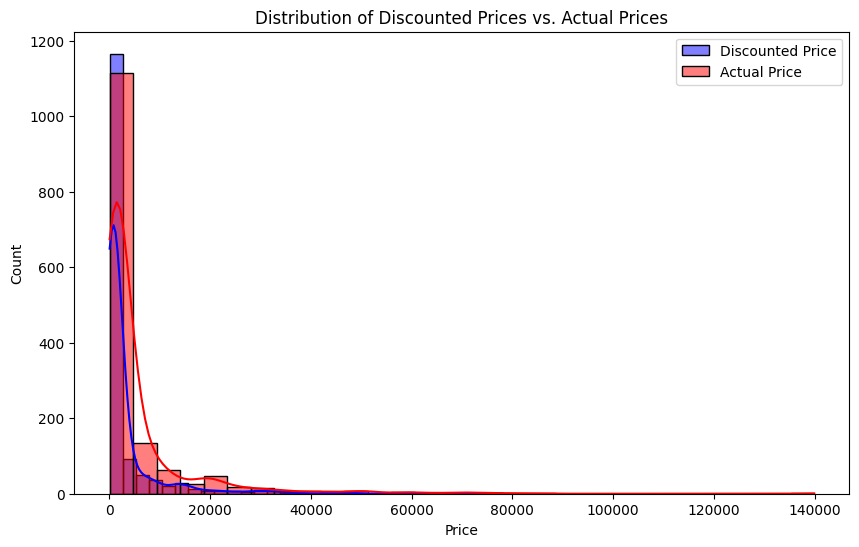


Average discount percentage across categories:
                                              category  discount_percentage
0    Car&Motorbike|CarAccessories|InteriorAccessori...                 42.0
1    Computers&Accessories|Accessories&Peripherals|...                 78.5
2    Computers&Accessories|Accessories&Peripherals|...                 35.0
3    Computers&Accessories|Accessories&Peripherals|...                 56.5
4    Computers&Accessories|Accessories&Peripherals|...                 46.5
..                                                 ...                  ...
206  OfficeProducts|OfficePaperProducts|Paper|Stati...                  0.0
207  OfficeProducts|OfficePaperProducts|Paper|Stati...                  5.0
208  OfficeProducts|OfficePaperProducts|Paper|Stati...                 17.5
209  OfficeProducts|OfficePaperProducts|Paper|Stati...                 13.0
210  Toys&Games|Arts&Crafts|Drawing&PaintingSupplie...                  0.0

[211 rows x 2 columns]

Most popular pr

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files

uploaded = files.upload()
# Load the dataset
df = pd.read_csv("amazon.csv")
print("Data Loaded Successfully!")

#  Data Cleaning
# Drop missing values in key columns
df.dropna(subset=["category", "discounted_price", "actual_price", "rating", "rating_count", "discount_percentage"], inplace=True)

# Convert numeric columns to correct data types
df["discounted_price"] = df["discounted_price"].replace('[^\d.]', '', regex=True).astype(float)
df["actual_price"] = df["actual_price"].replace('[^\d.]', '', regex=True).astype(float)
df["discount_percentage"] = df["discount_percentage"].replace('[^\d.]', '', regex=True).astype(float)
df["rating"] = pd.to_numeric(df["rating"], errors="coerce")
df["rating_count"] = pd.to_numeric(df["rating_count"], errors="coerce")

#  Q1: Average Rating Per Category
category_avg_rating = df.groupby("category")["rating"].mean().reset_index()
print("\nAverage rating for each product category:")
print(category_avg_rating)

# Q2: Top Rated Products by Rating Count in Each Category
top_rated_products = df.sort_values(["category", "rating_count"], ascending=[True, False]).groupby("category").head(1)
print("\nTop rating_count products by category:")
print(top_rated_products[["category", "product_name", "rating_count", "rating"]])

# Q3: Distribution of Discounted Prices vs. Actual Prices ======
plt.figure(figsize=(10, 6))
sns.histplot(df["discounted_price"], bins=30, color="blue", label="Discounted Price", kde=True)
sns.histplot(df["actual_price"], bins=30, color="red", label="Actual Price", kde=True)
plt.legend()
plt.title("Distribution of Discounted Prices vs. Actual Prices")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

# Q4: Average Discount Percentage Across Categories
category_avg_discount = df.groupby("category")["discount_percentage"].mean().reset_index()
print("\nAverage discount percentage across categories:")
print(category_avg_discount)

#  Q5: Most Popular Product Names (Top 10 by Rating Count)
popular_products = df.groupby("product_name")["rating_count"].sum().reset_index().sort_values("rating_count", ascending=False).head(10)
print("\nMost popular product names:")
print(popular_products)

#  Q6: Most Popular Product Keywords
from collections import Counter

product_keywords = " ".join(df["about_product"].dropna()).lower().split()
common_keywords = Counter(product_keywords).most_common(10)
print("\nMost popular product keywords:")
print(common_keywords)

#  Q7: Most Popular Product Reviews
popular_reviews = df.groupby("review_content")["rating_count"].sum().reset_index().sort_values("rating_count", ascending=False).head(10)
print("\nMost popular product reviews:")
print(popular_reviews)

# Q8: Correlation Between Discounted Price and Rating
correlation = df["discounted_price"].corr(df["rating"])
print(f"\nCorrelation between discounted price and rating: {correlation:.2f}")

#  Q9: Top 5 Categories with Highest Ratings
top_categories = df.groupby("category")["rating"].mean().reset_index().sort_values("rating", ascending=False).head(5)
print("\nTop 5 categories based on the highest ratings:")
print(top_categories)

#  Q10: Potential Areas for Improvement
print("\nPotential Areas for Improvement:")
if correlation < 0:
    print("- Higher discounts may not necessarily lead to higher ratings.")
if df["rating"].isnull().sum() > 0:
    print("- Some products are missing ratings; consider encouraging customers to leave reviews.")
if df["rating_count"].isnull().sum() > 0:
    print("- Some products have very few reviews; consider strategies to increase customer feedback.")
if df["discount_percentage"].mean() < 20:
    print("- Overall discount percentage is low; increasing discounts may improve sales.")

print("\n✅ EDA Completed Successfully!")










EDA - 4|| Spotify

Saving spotify.csv to spotify (1).csv
Data Loaded Successfully!

Missing values per column:
 Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64

Number of duplicate rows: 27
✅ Duplicate rows removed.


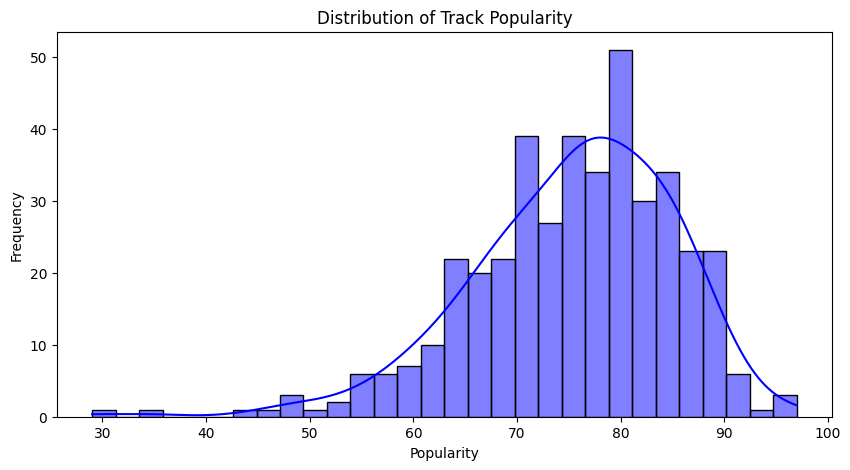

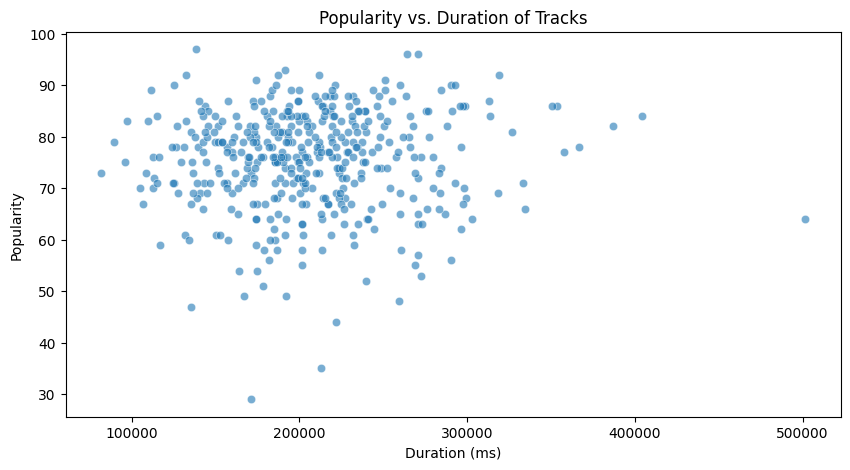

<ipython-input-6-85fa80278f6d>:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df["Artist"], order=top_artists.index, palette="viridis")


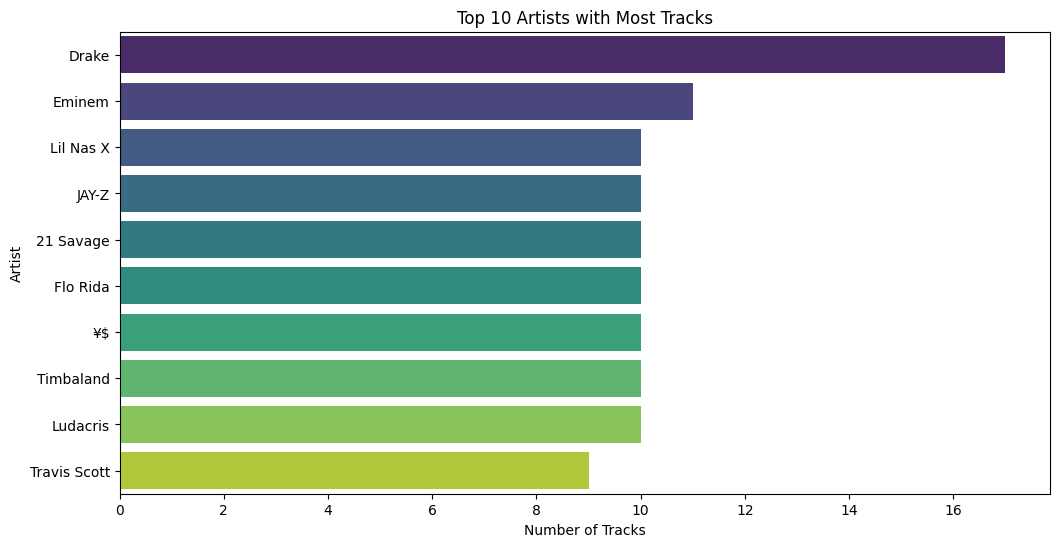


Top 5 Least Popular Tracks:
              Artist                     Track Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
413  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47
407     Wyclef Jean      911 (feat. Mary J. Blige)          48

Top 5 Most Popular Artists (Average Popularity):
 Artist
cassö           92.000000
Trueno          89.000000
David Guetta    87.000000
Travis Scott    86.555556
¥$              85.100000
Name: Popularity, dtype: float64

Most Popular Track for Each Top Artist:
                                 Track Name  Popularity
Artist                                                
David Guetta            Baby Don't Hurt Me          87
Travis Scott    FE!N (feat. Playboi Carti)          93
Trueno        Mamichula - con Nicki Nicole          89
cassö                                Prada          92

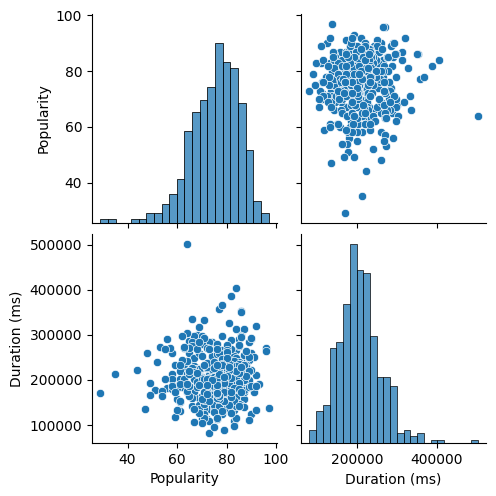

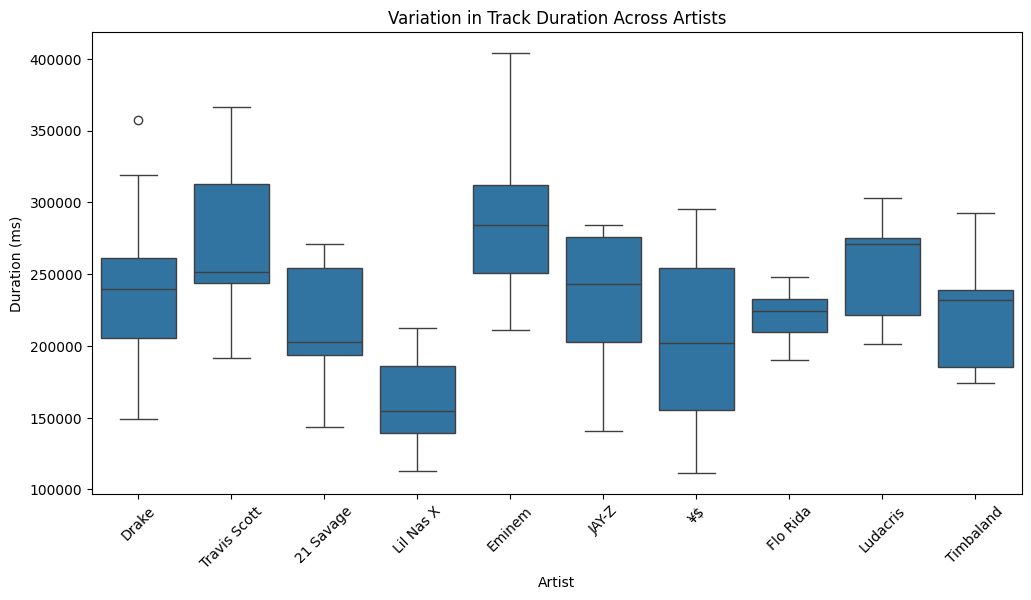

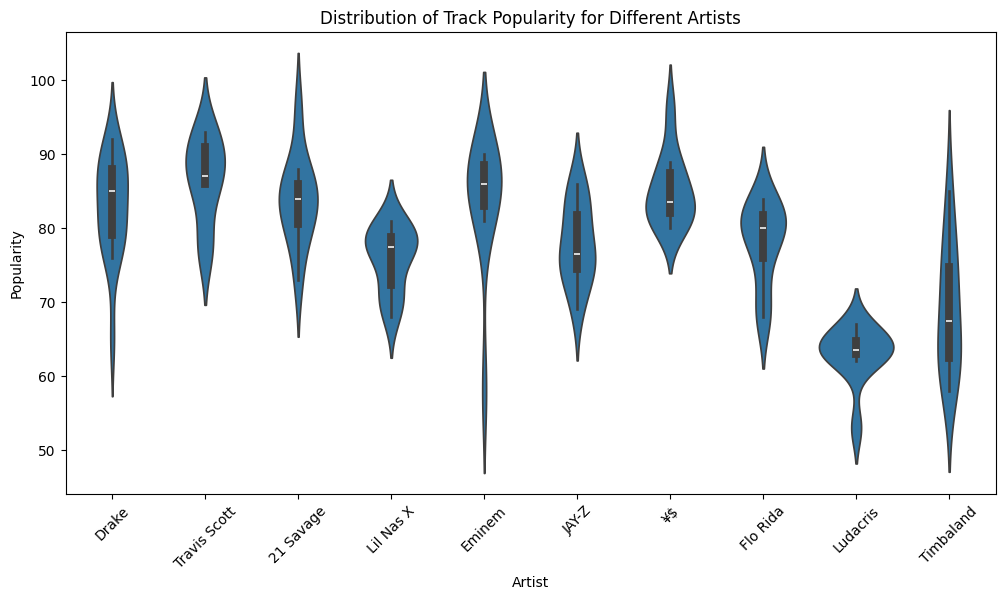


✅ EDA Completed Successfully!


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from google.colab import files

uploaded = files.upload()
# Load the dataset
df = pd.read_csv("spotify.csv")
print("Data Loaded Successfully!")

# Q1: Data Cleaning
# Check for missing values
print("\nMissing values per column:\n", df.isnull().sum())

# Drop rows with missing values
df.dropna(inplace=True)

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

# Drop duplicate rows if any
if duplicates > 0:
    df.drop_duplicates(inplace=True)
    print("✅ Duplicate rows removed.")

#  Q2: Distribution of Popularity
plt.figure(figsize=(10, 5))
sns.histplot(df["Popularity"], bins=30, kde=True, color="blue")
plt.title("Distribution of Track Popularity")
plt.xlabel("Popularity")
plt.ylabel("Frequency")
plt.show()

# Q3: Relationship Between Popularity & Duration
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df["Duration (ms)"], y=df["Popularity"], alpha=0.6)
plt.title("Popularity vs. Duration of Tracks")
plt.xlabel("Duration (ms)")
plt.ylabel("Popularity")
plt.show()

#  Q4: Artist with Most Tracks
plt.figure(figsize=(12, 6))
top_artists = df["Artist"].value_counts().head(10)
sns.countplot(y=df["Artist"], order=top_artists.index, palette="viridis")
plt.title("Top 10 Artists with Most Tracks")
plt.xlabel("Number of Tracks")
plt.ylabel("Artist")
plt.show()

#  Q5: Top 5 Least Popular Tracks
least_popular_tracks = df.nsmallest(5, "Popularity")[["Artist", "Track Name", "Popularity"]]
print("\nTop 5 Least Popular Tracks:\n", least_popular_tracks)

#  Q6: Top 5 Most Popular Artists by Average Popularity
top_popular_artists = df.groupby("Artist")["Popularity"].mean().nlargest(5)
print("\nTop 5 Most Popular Artists (Average Popularity):\n", top_popular_artists)

#  Q7: Most Popular Track for Each of the Top 5 Artists
most_popular_tracks = df[df["Artist"].isin(top_popular_artists.index)].sort_values(by="Popularity", ascending=False)
popular_tracks_per_artist = most_popular_tracks.groupby("Artist").first()[["Track Name", "Popularity"]]
print("\nMost Popular Track for Each Top Artist:\n", popular_tracks_per_artist)

# Q8: Pair Plot for Multiple Numeric Variables
sns.pairplot(df[["Popularity", "Duration (ms)"]])
plt.show()

#  Q9: Variation in Track Duration Across Artists
plt.figure(figsize=(12, 6))
top_10_artists = df["Artist"].value_counts().head(10).index
sns.boxplot(x="Artist", y="Duration (ms)", data=df[df["Artist"].isin(top_10_artists)])
plt.xticks(rotation=45)
plt.title("Variation in Track Duration Across Artists")
plt.show()

#  Q10: Distribution of Popularity for Different Artists
plt.figure(figsize=(12, 6))
sns.violinplot(x="Artist", y="Popularity", data=df[df["Artist"].isin(top_10_artists)])
plt.xticks(rotation=45)
plt.title("Distribution of Track Popularity for Different Artists")
plt.show()

print("\n✅ EDA Completed Successfully!")
